If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [2]:
#!pip3 install scikit-learn==1.3.2

In [4]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt # data visualization library
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


# PCA Faces

In [5]:
from sklearn.datasets import fetch_olivetti_faces
import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

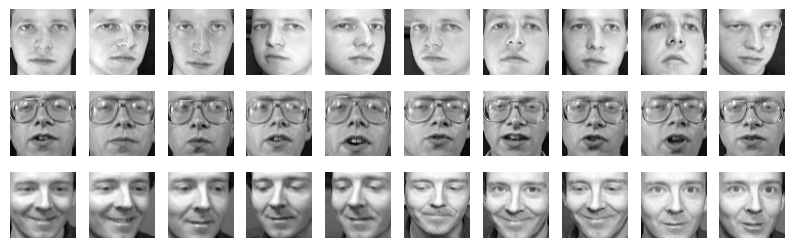

In [6]:
# This is how you plot the first thirty pictures of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    
    ax.imshow(faces.data[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [7]:
D = faces.data
D.shape

(400, 4096)

### Exercise 1a
plot the principal PC6 to PC9 components as images

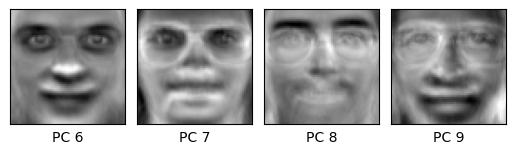

In [60]:
def MyPCA(D, r):
    # Center the data
    C = D - np.mean(D, axis=0)

    # Compute Truncated SVD
    svd = TruncatedSVD(n_components=r)
    Y = svd.fit_transform(C)

    return svd.components_, Y

svd_components, _ = MyPCA(D, 9)

# Plot principal components PC5 to PC8 as images
n_components_to_plot = 4  # Set the number of principal components to plot
fig, axes = plt.subplots(1, n_components_to_plot,
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(n_components_to_plot):
    axes[i].imshow(svd_components[i + 5].reshape(64, 64), cmap='gray')  # Adjust index for PC5 to PC8
    axes[i].set_xlabel(f'PC {i + 6}', fontsize=10)  # Label for PC5 to PC8

### Exercise 1b
Compute a PCA of dimension $r=3$. What are the coordinates of the low-dimensional representation of the 5th datapoint (having Python index 4)? 

In [61]:
_, Y = MyPCA(D, 3)

Y[4]

array([-3.962005 , -3.2938714,  3.652895 ], dtype=float32)

### Exercise 1c

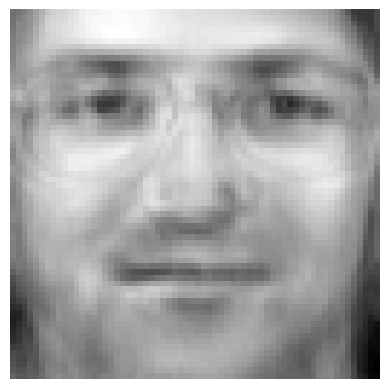

In [84]:
from scipy.linalg import svd

# Center the data
mean_vector = np.mean(D, axis=0)
D_centered = D - mean_vector

# Perform SVD
U, S, Vt = svd(D_centered)

low_dim_vector = np.array([0.5] * 25 + [-0.5] * 25)

# Reconstruct the face with 50 PCA's
reconstructed_face = mean_vector + (low_dim_vector @ Vt[:50])

# Reshape the face to 64x64 for visualization
reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)

# Visualize
plt.imshow(reconstructed_face_reshaped, cmap='gray')
plt.axis("off")
plt.show()